## 데이터와 행렬
- 스칼라 : 숫자 하나만으로 이루어진 데이터
- 벡터 : 여러 숫자가 특정한 순서대로 모여 있는 것을 의미. 하나의 벡터를 이루는 데이터 수가 n개이면 n-차원 벡터라고 함
- 열벡터는 열의 수가 1인 행렬
- 하나의 데이터 레코드를 단독으로 벡터로 나타낼 때는 하나의 열로 나타내고 복수의 데이터 레코드 집합을 행렬로 나타낼 때는 하나의 데이터 레코드가 하나의 행으로 표기하는 것은 데이터 분석에서 일반적인 관례
- 스칼라와 벡터도 수학적으로는 행렬에 속한다.
- 스칼라는 열과 행의 수가 각각 1인 행렬이고 벡터는 열의 수가 1인 행렬이다.


Python Numpy 선형대수
- 단위행렬 (Unit matrix): np.eye(n)
- 대각행렬 (Diagonal matrix): np.diag(x)
- 내적 (Dot product, Inner product): np.dot(a, b)
- 대각합 (Trace): np.trace(x)
- 행렬식 (Matrix Determinant): np.linalg.det(x)
- 역행렬 (Inverse of a matrix): np.linalg.inv(x)
- 고유값 (Eigenvalue), 고유벡터 (Eigenvector): w, v = np.linalg.eig(x)
- 특이값 분해 (Singular Value Decomposition): u, s, vh = np.linalg.svd(A)
- 연립방정식 해 풀기 (Solve a linear matrix equation): np.linalg.solve(a, b)
- 최소자승 해 풀기 (Compute the Least-squares solution): m, c=np.linalg.lstsq(A, y, rcond=None)[0]

https://rfriend.tistory.com/380


In [2]:
# 단위행렬(항등행렬), 대각선이 1인 행렬
import numpy as np
unit_matrix_5=np.eye(5)
print(unit_matrix_5)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [20]:
# 대각행렬, 대각성분 이외의 모든 성분이 모두 0인 n차 정방행렬
x = np.arange(9).reshape(3,3)
print(x)
np.diag(x)
np.diag(np.diag(x))

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[0, 0, 0],
       [0, 4, 0],
       [0, 0, 8]])

## 내적
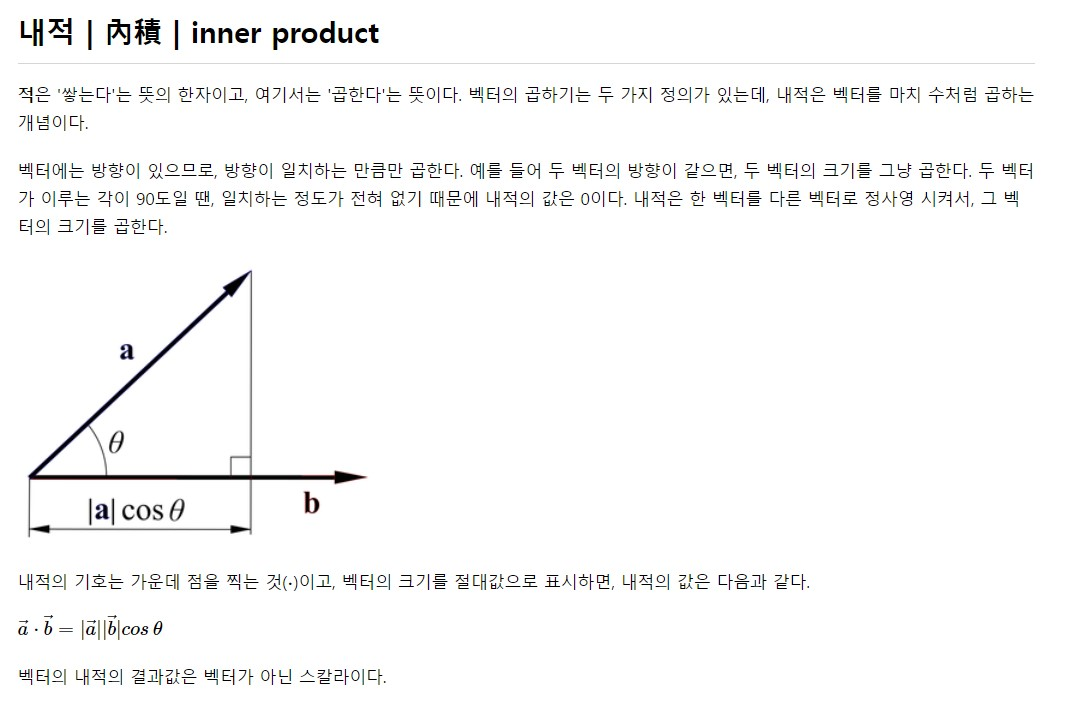

벡터 a를 벡터 b와 같은 방향의 성분과 그렇지 않은 성분으로 분해한다고 할 때 $|a|cosθ$의 길이는 벡터 b와 같은 방향의 성분 길이와 같다.  

벡터 a와 b의 내적은 벡터 b의 길이와 벡터 a에서 벡터 b와 같은 방향의 성분 길이를 곱한 것이다.

- 행렬 내적은 행렬 곱이며 두 행렬 A와 B의 내적은 np.dot()을 이용해 계산이 가능
- 행렬 내적의 특성으로 왼쪽 행렬의 열개수와 오른쪽 행렬의 행개수가 동일해야 내적 연산 가능


In [22]:
# 행렬 안 원소 간의 곱
a = np.arange(4).reshape(2,2)
print(a)
a*a

[[0 1]
 [2 3]]


array([[0, 1],
       [4, 9]])

In [26]:
# 내적
a = np.arange(4).reshape(2,2)
print(a)
print('\n')
print(np.dot(a,a))
a.dot(a)

[[0 1]
 [2 3]]


[[ 2  3]
 [ 6 11]]


array([[ 2,  3],
       [ 6, 11]])

In [5]:
x = np.arange(1,7).reshape(2,3)
y = np.array([[6.,23],[-1,7],[8,9]])

print(x)
print(y)
print(np.dot(x,y))

[[1 2 3]
 [4 5 6]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]
[[ 28.  64.]
 [ 67. 181.]]


In [29]:
# 대각합
np.trace(a)
# 3차원 대각합
c = np.arange(27).reshape(3,3,3)
print(c)
np.trace(c)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


array([36, 39, 42])

In [32]:
# 행렬식, 역행렬이 존재하는지 확인하는 방법. 행렬식이 0이 아니면 역행렬이 존재한다.
# 면적이나 부피를 구하는 것

d = np.array([[1,2],[3,4]])
np.linalg.det(d)

-2.0000000000000004

In [34]:
# 역행렬, n차정방행렬과의 곱이 항등행렬 또는 단위행렬이 되는 n차정방행렬

a = np.array(range(4)).reshape(2, 2)
a_inv = np.linalg.inv(a)
a_inv

array([[-1.5,  0.5],
       [ 1. ,  0. ]])

In [36]:
# 고유값, 고유벡터
# 정방행렬 A에 대하여 Ax = 람다x가 성립하는 0이 아닌 벡터 x가 존재할 때, 
# 상수 람다를 행렬 A의 고유값(크기) x를 이에 대응하는 고유벡터(방향)라고 한다.

w,v = np.linalg.eig(a)
print('the eigenvalues lambda : ',w)
print('the corresponding eigenvectors, one eigenvector per column : ', v)
# 고유벡터는 배열 인덱싱하는 방법을 사용해서 각 고유값에 대응하는 고유벡터를 선택가능
print(v[:,0])
print(v[:,1])

the eigenvalues lambda :  [-0.56155281  3.56155281]
the corresponding eigenvectors, one eigenvector per column :  [[-0.87192821 -0.27032301]
 [ 0.48963374 -0.96276969]]
[-0.87192821  0.48963374]
[-0.27032301 -0.96276969]


In [38]:
# 특이값 분해
# 고유값 분해처럼 행렬을 대각화하는 한 방법, 정방행렬 뿐만 아니라 모든 m*n행렬에 대해 적용가능
# 특이값 분해는 차원축소, 데이터 압축 등에 사용할 수 있다. 

A = np.array([[3,6], [2,3], [0,0], [0,0]])
print(A, '\n')

u, s, vh = np.linalg.svd(A)

print(u, '\n')
print(s, '\n')
print(vh, '\n')

[[3 6]
 [2 3]
 [0 0]
 [0 0]] 

[[-0.8816746  -0.47185793  0.          0.        ]
 [-0.47185793  0.8816746   0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]] 

[7.60555128 0.39444872] 

[[-0.47185793 -0.8816746 ]
 [ 0.8816746  -0.47185793]] 



In [ ]:
# 과제_1013_1 상기 각 항목에 대한 예제를 풀어보세요.

행렬곱을 응용하여 신경망에 적용
<img src='행렬곱.jpg' style='whidth:300px;'>

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
print(digits.images[0].shape)

(8, 8)


In [2]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

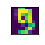

In [13]:
plt.figure(figsize=(0.5,0.5))
plt.imshow(digits.images[9])
plt.grid(False);plt.xticks([]);plt.yticks([])
plt.show()

[[0.3305785  0.30578512 0.3305785  ... 0.3966942  0.37190083 0.28512397]
 [0.32231405 0.32231405 0.29752067 ... 0.41322315 0.338843   0.2603306 ]
 [0.3264463  0.30991736 0.30578512 ... 0.40495867 0.36363637 0.27272728]
 ...
 [0.16115703 0.16528925 0.1570248  ... 0.14049587 0.1570248  0.16115703]
 [0.1570248  0.17768595 0.16115703 ... 0.14049587 0.1570248  0.1570248 ]
 [0.17768595 0.1694215  0.16528925 ... 0.1446281  0.15289256 0.15289256]] 



Text(0.5, 1.0, 'image 1: $x_1$')

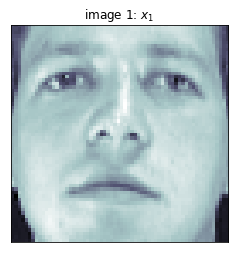

In [18]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
print(faces.images[6],'\n')
f,ax = plt.subplots(1,1)

ax.imshow(faces.images[6], cmap=plt.cm.bone)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("image 1: $x_1$")

[[0.3305785  0.30578512 0.3305785  ... 0.3966942  0.37190083 0.28512397]
 [0.32231405 0.32231405 0.29752067 ... 0.41322315 0.338843   0.2603306 ]
 [0.3264463  0.30991736 0.30578512 ... 0.40495867 0.36363637 0.27272728]
 ...
 [0.16115703 0.16528925 0.1570248  ... 0.14049587 0.1570248  0.16115703]
 [0.1570248  0.17768595 0.16115703 ... 0.14049587 0.1570248  0.1570248 ]
 [0.17768595 0.1694215  0.16528925 ... 0.1446281  0.15289256 0.15289256]] 



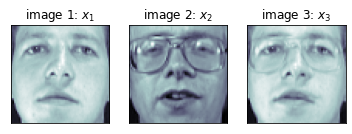

In [32]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
print(faces.images[6],'\n')
f,ax = plt.subplots(1,3)

ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1: $x_1$")

ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2: $x_2$")

new_face = 0.7*faces.images[6]+0.3*faces.images[10]
ax[2].imshow(new_face, cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3: $x_3$")

plt.show()

In [34]:
len(faces.images)

400

In [37]:
import numpy as np
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
C1 = A@B
C2 = np.dot(A,B)

print(C1, '\n')
print(C2)

[[22 28]
 [49 64]] 

[[22 28]
 [49 64]]


In [38]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
C = np.array([[9,8],[7,6]])



In [40]:
# 교환법칙이 성립하지 않는다.
C1 = A@B
C2 = B@A

print(C1, '\n')
print(C2)

[[19 22]
 [43 50]] 

[[23 34]
 [31 46]]


In [44]:
# 분배 법칙은 성립함

print(A@(B+C),'\n')
print(A@B+A@C)

[[42 42]
 [98 98]] 

[[42 42]
 [98 98]]


In [47]:
# 전치 연산도 덧셈, 뺄셈에 대한 분배 법칙이 성립
print((A+B).T,'\n')
print(A.T + B.T)

[[ 6 10]
 [ 8 12]] 

[[ 6 10]
 [ 8 12]]


In [52]:
# 전치 연산과 곱셈의 경우에는 분배법칙이 성립하지만 전치연산이 분배되면서 곱셈의 순서가 바뀜
print((A@B).T)
print(B.T@A.T)
print(A.T@B.T)

[[19 43]
 [22 50]]
[[19 43]
 [22 50]]
[[23 31]
 [34 46]]


In [55]:
# 항등행렬의 곱셈
A = np.array([[1,2],[3,4]])
I = np.eye(2)
I

array([[1., 0.],
       [0., 1.]])

In [56]:
A@I

array([[1., 2.],
       [3., 4.]])

In [57]:
I@A

array([[1., 2.],
       [3., 4.]])

In [58]:
# 대각합 계산
np.trace(np.eye(3))

3.0

#### 행렬식
https://ratsgo.github.io/linear%20algebra/2017/05/21/determinants/
https://www.youtube.com/watch?v=fuVMiyahzH4


In [88]:
import numpy.linalg as LA

d = np.array([[1,0],
             [0,1]])
print(LA.det(d),'\n')

# 에러 : 2차원은 정방행렬이여야 함
e = np.array([[2,0,0],
              [0,1,0],
              [0,0,1]])

print(LA.det(e))

1.0 

2.0


In [101]:
# Q. 5행 5열 행렬을 생성하고 행렬식으로 부피를 구하세요.
T = 3*np.eye(5)
print(T)
print(LA.det(T))

[[3. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 3.]]
243.00000000000017


In [105]:
3**5

243

In [108]:
np.arange(1,26).reshape(5,5)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

#### 선형 연립방정식

- 선형예측모형은 입력 데이터 벡터와 가중치 벡터의 내적으로 계산된 예측값이 실제 출력 데이터와 유사한 값을 출력하도록 하는 모형
- 연립방정식과 역행렬을 이용하여 선형 예측 모형의 가중치 벡터를 구할 수 있다.
역행렬
- 정방행렬에 대한 역행렬은 원래의 행렬과 다음 관계를 만족하는 정방행렬을 의미 $A^{-1}A = AA^{-1} = I$, I는 항등행렬


In [109]:
np.random.seed(0)
mt1 = np.random.randint(1,4,size=(3,3))
mt1

array([[1, 2, 1],
       [2, 2, 3],
       [1, 3, 1]])

In [110]:
mt2 = np.linalg.inv(mt1)
mt2

array([[ 7., -1., -4.],
       [-1.,  0.,  1.],
       [-4.,  1.,  2.]])

In [111]:
np.dot(mt1,mt2)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [115]:
# 역행렬을 구하고 
arr = np.matrix([[1,3],[5,7]])
arr2 = np.linalg.inv(arr)
print(arr,'\n')
print(arr2,'\n')
print(np.dot(arr,arr2))

[[1 3]
 [5 7]] 

[[-0.875  0.375]
 [ 0.625 -0.125]] 

[[ 1.00000000e+00 -5.55111512e-17]
 [ 0.00000000e+00  1.00000000e+00]]


### 함수

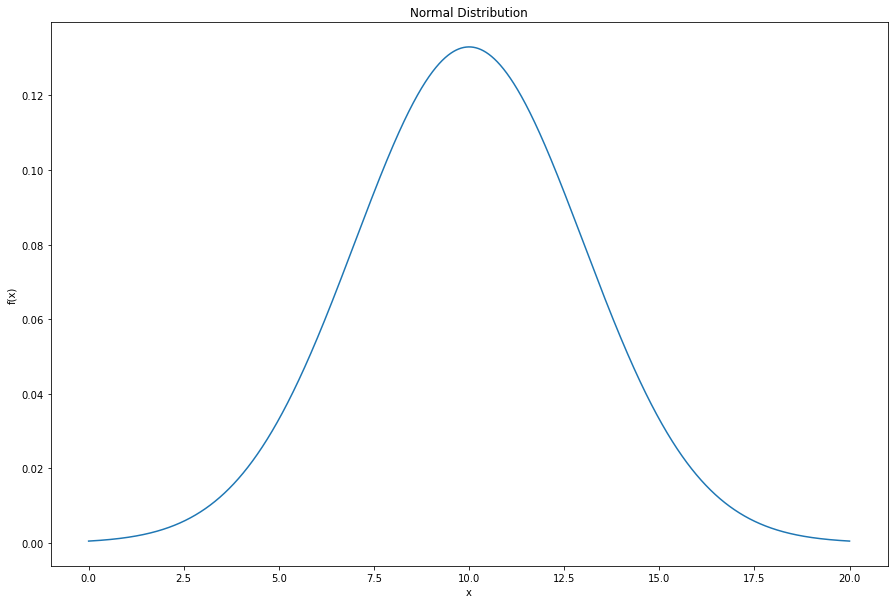

In [14]:
# Q. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현

import matplotlib.pyplot as plt #1
import numpy as np #2
from scipy.stats import norm #3

x = np.arange(0, 20, 0.001) #4
plt.figure(figsize=(15,10)) #5
plt.title('Normal Distribution') #6
plt.xlabel('x') #7
plt.ylabel('f(x)') #8
plt.plot(x,norm.pdf(x, 10, 3)) #10
plt.show() #11

In [6]:
norm.ppf(x,10,3)

array([      -inf, 0.72930308, 1.36551478, ...,        nan,        nan,
              nan])

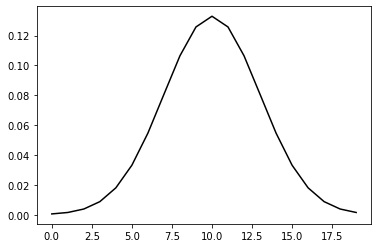

In [21]:
from scipy import stats
import matplotlib.pyplot as plt

x_plot = np.arange(0,20)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=10, scale=3), color='black')
plt.show()

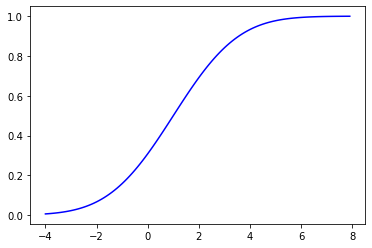

In [22]:
# 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현
x_plot = np.arange(-4,8,0.1)
plt.plot(x_plot, stats.norm.cdf(x=x_plot, loc=1, scale=2), color='b')

역함수 : 어떤 함수의 입력/출력 관계와 정반대의 입출력 관계를 갖는 함수를 역함수라고 한다.
원래의 함수에서 x축과 y축이 바뀐 것이므로 y=x가 나타내는 직선(원점을 통과하는 기울기 1인 직선)을 대칭축으로 대칭인 함수의 그래프


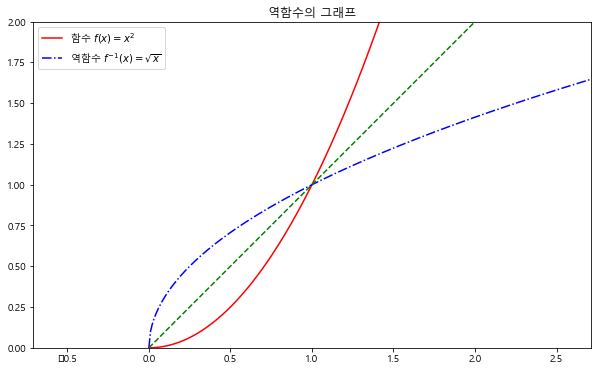

In [30]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc("font",family="Malgun Gothic")


def f1(x):
    return x**2

def f1inv(x):
    return np.sqrt(x)

x = np.linspace(0,3,300)
plt.figure(figsize=(10,6))
plt.plot(x,f1(x),"r",label='함수 $f(x)=x^2$')
plt.plot(x,f1inv(x),"b-.",label='역함수 $f^{-1}(x)=\sqrt{x}$')
plt.plot(x,x,"g--")
plt.axis('equal')
plt.xlim(0,2)
plt.ylim(0,2)
plt.legend()
plt.title('역함수의 그래프')
plt.show()


In [31]:
def f(x):
    return (x**2+1)
def g(x):
    return (np.sqrt(x-1))

In [32]:
xx1 = np.linspace(0.0,4.0,200)
xx2 = np.linspace(1.0,4.0,200)
yy1 = f(xx1)
yy2 = g(xx2)

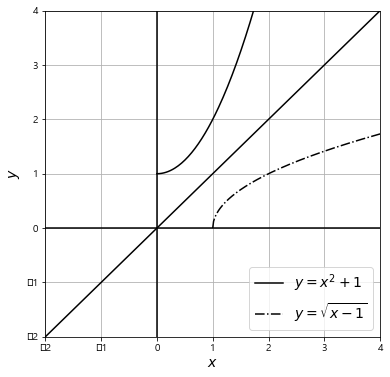

In [35]:
# 역함수의 그래프
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
plt.figure(figsize=(6,6))
plt.xlabel('$x$',fontsize=14)
plt.ylabel('$y$',fontsize=14)
plt.ylim(-2.0, 4.0)
plt.xlim(-2.0, 4.0)
plt.grid()
plt.plot(xx1,yy1, linestyle='-', c='k', label='$y=x^2+1$')
plt.plot(xx2,yy2, linestyle='-.', c='k', label='$y=\sqrt{x-1}$')
plt.plot([-2,4],[-2,4], color='black')
plt.plot([-2,4],[0,0], color='black')
plt.plot([0,0],[-2,4],color='black')
plt.legend(fontsize=14)


In [36]:
y = f(x)
x = g(x)

y = f(g(x))

# 활성화 함수 : 예시, 시그모이드 함수(오즈의 비)
# 가중치에 대해 활성화 함수를 적용, 선형 변환이 아니라 비선형 변환을 함

Text(0, 0.5, '$ReLU(x)$')

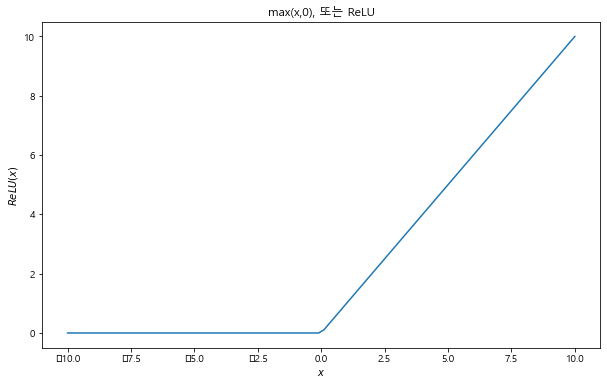

In [38]:
xx = np.linspace(-10,10,100)
plt.figure(figsize=(10,6))
plt.plot(xx,np.maximum(xx,0))
plt.title('max(x,0), 또는 ReLU')
plt.xlabel('$x$')
plt.ylabel('$ReLU(x)$')


지수함수
- 정해진 어떤 값을 입력값으로 거듭제곱하여 출력을 구하는 함수
- 거듭 제곱을 할 때 아래에 있는 수를 밑이라고 하며 밑을 오일러 수 e(약 2.718)로 하여 거듭제곱하는 함수를 지수함수라고 한다.
- $y=e^x$, y=exp(x) = exp x 로 표시


In [39]:
np.e

2.718281828459045

In [43]:
np.exp(-10), np.exp(-1), np.exp(-0.1), np.exp(0), np.exp(0.1), np.exp(1), np.exp(10)

(4.5399929762484854e-05,
 0.36787944117144233,
 0.9048374180359595,
 1.0,
 1.1051709180756477,
 2.718281828459045,
 22026.465794806718)

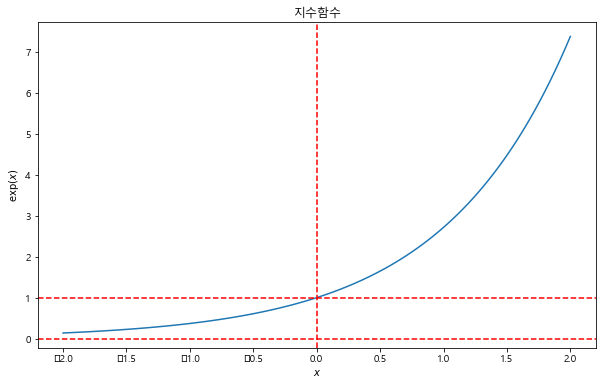

In [44]:
xx = np.linspace(-2, 2, 100)
yy = np.exp(xx)
plt.figure(figsize=(10,6))
plt.title("지수함수")
plt.plot(xx, yy)
plt.axhline(1, c='r', ls="--")
plt.axhline(0, c='r', ls="--")
plt.axvline(0, c='r', ls="--")
plt.xlabel("$x$")
plt.ylabel("$\exp(x)$")
plt.show()


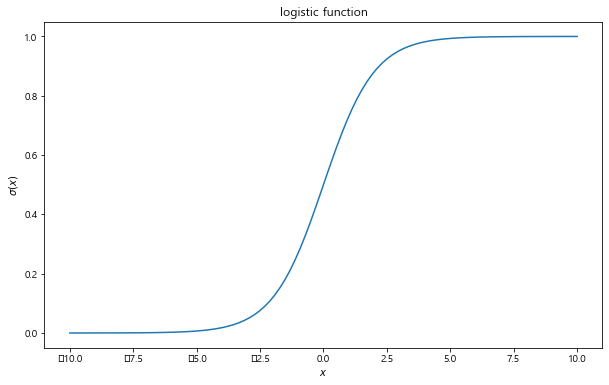

In [48]:
#  로지스틱 함수 : 지수함수를 변형한 함수로 시그모이드 함수의 하나이다.

def logistic(x):
    return 1/(1+np.exp(-x))
xx = np.linspace(-10,10,100)
plt.figure(figsize=(10,6))
plt.plot(xx, logistic(xx))
plt.title('logistic function')
plt.xlabel('$x$')
plt.ylabel('$\sigma(x)$')
plt.show()

로그함수 : 
- e를 거듭제곱하여 특정한 값이 되는 수를 찾을 필요가 있는데 e를 몇 제곱해야 10이라는 값이 될까? e를 2.3025851 거듭제곱하면 10이 된다. e를 거듭제곱하여 특정한 수 a가 되도록 하는 수를 log a라 표기하고 로그라고 읽는다.


In [55]:
np.exp(2), np.exp(3), np.exp(2.302585092994046)

(7.38905609893065, 20.085536923187668, 10.000000000000002)

In [60]:
np.log(10), np.log(20.085536923187668),np.log(7.38905609893065), np.log(4)

(2.302585092994046, 3.0, 2.0, 1.3862943611198906)

Text(0, 0.5, '$\\log(x)$')

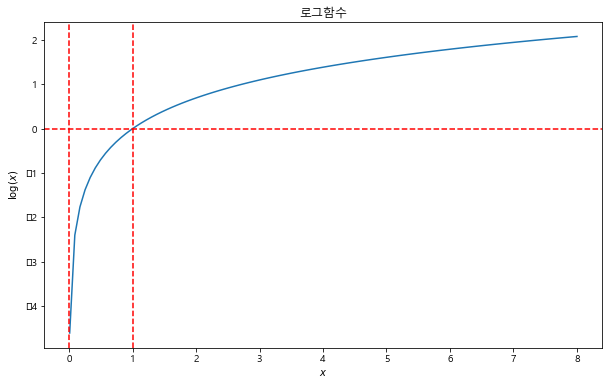

In [61]:
xx = np.linspace(0.01, 8, 100)
yy = np.log(xx)
plt.figure(figsize=(10,6))
plt.title("로그함수")
plt.plot(xx, yy)
plt.axhline(0, c='r', ls="--")
plt.axvline(0, c='r', ls="--")
plt.axvline(1, c='r', ls="--")
plt.xlabel("$x$")
plt.ylabel("$\log(x)$")


## 미분

최적화를 하기 위해서는 입력값이 변했을 때 함수의 출력값이 어떻게 달라지는지를 정량적으로 알아야 하며 이러한 과정이 미분이다.

함수의 그래프상에 있는 한 점을 줌심으로 그래프를 무한히 확대해 보면 그래프의 모양이 직선에 가까워지는데 이때의 기울기를 미분이라고 한다. 이 직선은 같은 점을 기준으로 그린 그래프의 접선과 같다.

신경망에서 미분의 필요성 : https://gggggeun.tistory.com/120           https://gggggeun.tistory.com/121

미분 개념 : https://www.youtube.com/watch?v=kMZ3RJEaLE4


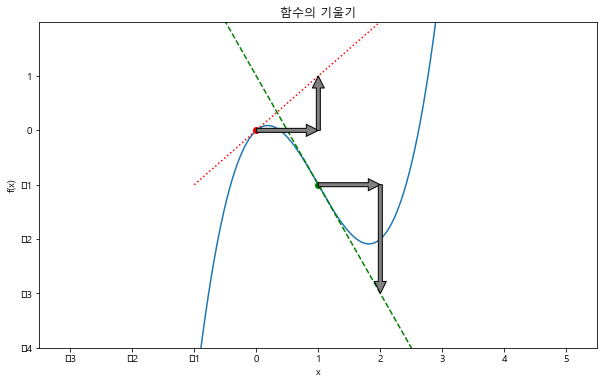

In [66]:
def f(x):
    return x**3 - 3 * x**2 + x 

x = np.linspace(-1, 3, 400)
y = f(x)
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.plot(0, 0, 'ro')
plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go')
plt.plot(x, (3*1**2-6*1+1)*(x-1)-1, 'g--')

plt.xlim(-3.5, 5.5)
plt.ylim(-4, 2)
plt.xticks(np.arange(-3, 6))
plt.yticks(np.arange(-4, 2))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='gray'))

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("함수의 기울기")
plt.show()


Text(0.5, 1.0, 'delta = 0.0100')

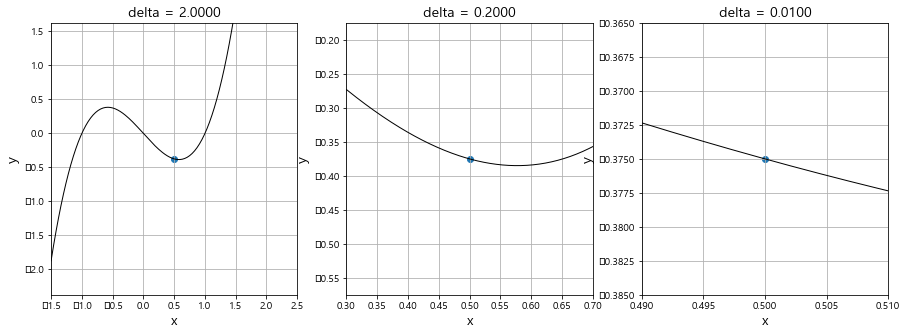

In [68]:
def f(x):
    return(x**3 - x)

plt.figure(figsize=(15, 5))
delta = [2.0, 0.2, 0.01]

x = np.linspace(0.5-delta[0], 0.5+delta[0], 200)
y = f(x)

plt.subplot(131)

plt.ylim(-3.0/8.0-delta[0], -3.0/8.0+delta[0])
plt.xlim(0.5-delta[0], 0.5+delta[0])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[0], fontsize=14)

x = np.linspace(0.5-delta[1], 0.5+delta[1], 200)
y = f(x)

plt.subplot(132)

plt.ylim(-3.0/8.0-delta[1], -3.0/8.0+delta[1])
plt.xlim(0.5-delta[1], 0.5+delta[1])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[1], fontsize=14)

x = np.linspace(0.5-delta[2], 0.5+delta[2], 200)
y = f(x)

plt.subplot(133)

plt.ylim(-3.0/8.0-delta[2], -3.0/8.0+delta[2])
plt.xlim(0.5-delta[2], 0.5+delta[2])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[2], fontsize=14)


### 접선의 방정식

- 함수 f(x)에서 x의 값을 dx만큼 변화시켰을 때 f(x)의 변화량 (f(x+dx)-f(x))는 f'(x)dx와 같다.
- 미분 : y=f(x)라는 그래프상의 점(a,f(a))가 있을 때 그 점에서 그은 접선의 기울기는 f'(a)이며 a에서의 순간 변화율을 의미
- 적분 : 도함수 f'(x)의 하방 면적은 원 함수 f(x)의 y의 값이다. ex) f(x) = $x^2$


In [69]:
x = np.linspace(-4,4,100)

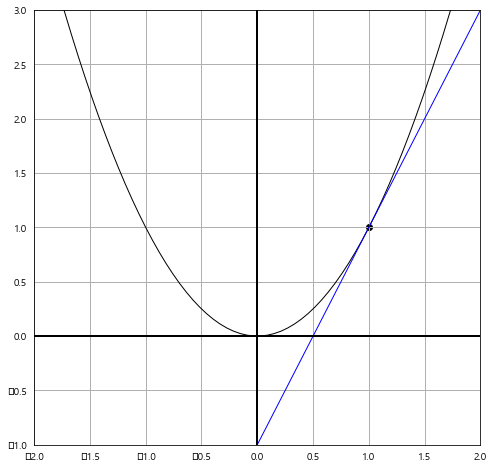

In [73]:
def f(x):
    return (x**2)
def g(x):
    return (2*x -1)

x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(8,8))
plt.scatter([1],[1],c='k')
plt.plot(x, f(x), 'b-', lw=1, c='k')
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(-1, 3)
plt.xlim(-2, 2)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')


In [75]:
!pip install sympy

In [76]:
import sympy
x,y = sympy.symbols('x y')
f = x**2 + 4*x*y +4*y**2
f

x**2 + 4*x*y + 4*y**2

In [83]:
# diff() 함수로 미분, 변수, 상수를 구분하기 위하여 편미분인 것처럼 입력 변수 지정

sympy.diff(f,x)
sympy.diff(f,y)

4*x + 8*y

## 적분
- 적분은 미분과 반대되는 개념. 부정적분과 정적분이 있다.
 - 부정적분은 정확하게 미분과 반대되는 개념. 즉 반 미분이다. 어떤 함수를 미분하여 나온 결과인 도함수라고 가정하고 이 도함수 f(x)에 대한 미분되기 전의 원래의 함수를 찾는 과정 또는 그 결과를 의미
 - 정적분은 독립변수 x가 어떤 구간 [a,b] 사이일 때 그 구간에서 함수 f(x)의 값과 수평선(x축)이 이루는 면적을 구하는 행위 혹은 그 값을 의미
 
적분의 개념 : https://www.youtube.com/watch?v=kV2j3S5qBm4

미분과 적분의 관계 : https://www.youtube.com/watch?v=xAAAvj7bmKQ


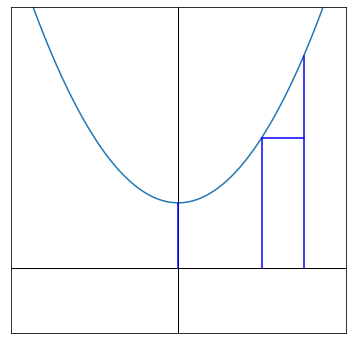

In [84]:
def f(x) :
    return x**2 + 1
xx = np.linspace(-4.0, 4.0, 200)
yy = f(xx)

plt.figure(figsize=(6,6))
plt.xlim(-2,2)
plt.ylim(-1,4)
plt.plot(xx, yy)
plt.plot([-2,2],[0,0],c='k',lw=1)
plt.plot([0,0],[-1,4],c='k',lw=1)
plt.plot([0,0],[0,f(0)],c='b')
plt.plot([1,1],[0,f(1)],c='b')
plt.plot([1.5,1.5],[0,f(1.5)],c='b')
plt.plot([1,1.5],[f(1),f(1)],c='b')
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')


## 정적분 예

(0.0, 8.0)

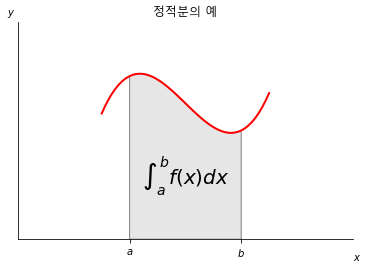

In [85]:
from matplotlib.patches import Polygon


def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6


a, b = 0, 2
x = np.linspace(a - 0.5, b + 0.5, 50)
y = f(x)

ax = plt.subplot(111)
plt.title("정적분의 예")
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(bottom=0)
ix = np.linspace(a, b)
iy = f(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.5 * (a + b), 0.2 * (f(a) + f(b)), r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])
ax.set_xlim(-2, 4)
ax.set_ylim(0, 8)
